# **Notebook 6: Regression with Cleaned and Transformed Dataset**

## Objectives

* To develop machine learning regression models for the continuous numerical target feature using a dataset with feature engineered and transformed variables
* If the initial regression model shows produces a better fitting and performing pipeline, further approaches (regression with PCA and classification) will be developed to find the best model. If the performance is not better than the model trained on the full dataset, no further investigation will be undertaken
* To see whether using the feature enginnered dataset produces a better model than the models trained on the full dataset (Notebook 5)

## Inputs

* The dataset that has been cleaned and feature engineered in Notebook 2 and Notebook 4:
('outputs/datasets/cleaned/TrainSetTransformed.csv' and 'outputs/datasets/cleaned/TestSetTransformed.csv')

## Outputs

* A pipeline for predicting houeprices
* Data on feature importance

## Additional Comments
* This notebook uses the cleaned and feature engineered dataset from Notebook 2 and Notebook 4.


---

## Change working directory

In [1]:
import os

# Get the current directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Change the directory to the new path
os.chdir('/workspace/milestone-project-housing-issues')

# Get the updated current directory
current_dir = os.getcwd()
print("New Current Directory:", current_dir)

Current Directory: /workspace/milestone-project-housing-issues/jupyter_notebooks
New Current Directory: /workspace/milestone-project-housing-issues


## Load dataset

### Load TrainSetTransformed

In [2]:
import pandas as pd
trainset_transformed = pd.read_csv('/workspace/milestone-project-housing-issues/outputs/datasets/cleaned/TrainSetTransformed.csv')
print(trainset_transformed.shape)
trainset_transformed.head()

(1168, 19)


,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearRemodAdd,SalePrice
0,984.0,3,0,15.937006,0,40.624672,34.732831,0,42.755117,0,11694.0,90.0,21.260292,4.977715,0,0,1822.0,2007,314813
1,720.0,2,1,69.279335,1,31.466463,23.053045,1,29.899833,1,6600.0,60.0,25.536738,4.242568,0,1,894.0,1962,109500
2,840.0,2,1,90.580158,2,15.356688,26.839552,0,31.048349,1,13360.0,80.0,15.099669,5.492862,1,1,876.0,2006,163500
3,676.0,3,1,126.511219,0,21.341597,36.315495,2,41.097445,0,13265.0,80.0,12.165525,4.300525,0,2,1568.0,2002,271000
4,806.0,3,1,110.906783,1,39.203404,36.055097,2,39.255573,0,13704.0,113.0,12.247449,4.654167,0,3,1541.0,2002,205000


In [3]:
trainset_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2ndFlrSF      1168 non-null   float64
 1   BedroomAbvGr  1168 non-null   int64  
 2   BsmtExposure  1168 non-null   int64  
 3   BsmtFinSF1    1168 non-null   float64
 4   BsmtFinType1  1168 non-null   int64  
 5   BsmtUnfSF     1168 non-null   float64
 6   GarageArea    1168 non-null   float64
 7   GarageFinish  1168 non-null   int64  
 8   GrLivArea     1168 non-null   float64
 9   KitchenQual   1168 non-null   int64  
 10  LotArea       1168 non-null   float64
 11  LotFrontage   1168 non-null   float64
 12  MasVnrArea    1168 non-null   float64
 13  OpenPorchSF   1168 non-null   float64
 14  OverallCond   1168 non-null   int64  
 15  OverallQual   1168 non-null   int64  
 16  TotalBsmtSF   1168 non-null   float64
 17  YearRemodAdd  1168 non-null   int64  
 18  SalePrice     1168 non-null 

In [4]:
missing_values_count = trainset_transformed.isna().sum()
missing_values_count

2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearRemodAdd    0
SalePrice       0
dtype: int64

### Load TestSetTransformed

In [5]:
import pandas as pd

testset_transformed = pd.read_csv('/workspace/milestone-project-housing-issues/outputs/datasets/cleaned/TestSetTransformed.csv')
print(testset_transformed.shape)
testset_transformed.head()

(292, 19)


,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearRemodAdd,SalePrice
0,892.000,4,1,126.575860,3,30.317045,28.233895,1,50.149776,1,17695.875,88.000,22.978251,2.939703,4,4,2035.0,1975,200624
1,620.000,3,1,63.310138,6,18.107132,20.578416,0,39.724048,3,9490.000,79.000,18.384776,5.096815,1,4,806.0,1980,133000
2,247.625,3,1,38.616805,5,25.266650,24.485212,0,34.684290,0,7015.000,106.000,12.688578,3.724104,6,1,709.0,2008,110000
3,866.000,4,1,62.215089,6,29.575211,28.771824,1,44.966654,1,10005.000,83.000,17.291616,5.068166,0,3,1160.0,1977,192000
4,762.000,3,1,96.578176,1,25.286640,21.494186,0,33.045423,1,1680.000,29.625,19.519221,3.218082,0,4,525.0,1971,88000


In [6]:
testset_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2ndFlrSF      292 non-null    float64
 1   BedroomAbvGr  292 non-null    int64  
 2   BsmtExposure  292 non-null    int64  
 3   BsmtFinSF1    292 non-null    float64
 4   BsmtFinType1  292 non-null    int64  
 5   BsmtUnfSF     292 non-null    float64
 6   GarageArea    292 non-null    float64
 7   GarageFinish  292 non-null    int64  
 8   GrLivArea     292 non-null    float64
 9   KitchenQual   292 non-null    int64  
 10  LotArea       292 non-null    float64
 11  LotFrontage   292 non-null    float64
 12  MasVnrArea    292 non-null    float64
 13  OpenPorchSF   292 non-null    float64
 14  OverallCond   292 non-null    int64  
 15  OverallQual   292 non-null    int64  
 16  TotalBsmtSF   292 non-null    float64
 17  YearRemodAdd  292 non-null    int64  
 18  SalePrice     292 non-null    

In [7]:
missing_values_count = testset_transformed.isna().sum()
missing_values_count

2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearRemodAdd    0
SalePrice       0
dtype: int64

---

### Combining trainset_transformed and testset_transform to enable fresh split into train and test sets

In [8]:
import pandas as pd

# Combine the two datasets row-wise
combined_df = pd.concat([trainset_transformed, testset_transformed], ignore_index=True)

# Check the combined dataframe
print(combined_df.shape)
print(combined_df.head())

(1460, 19)
   2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  BsmtUnfSF  \
0     984.0             3             0   15.937006             0  40.624672   
1     720.0             2             1   69.279335             1  31.466463   
2     840.0             2             1   90.580158             2  15.356688   
3     676.0             3             1  126.511219             0  21.341597   
4     806.0             3             1  110.906783             1  39.203404   

   GarageArea  GarageFinish  GrLivArea  KitchenQual  LotArea  LotFrontage  \
0   34.732831             0  42.755117            0  11694.0         90.0   
1   23.053045             1  29.899833            1   6600.0         60.0   
2   26.839552             0  31.048349            1  13360.0         80.0   
3   36.315495             2  41.097445            0  13265.0         80.0   
4   36.055097             2  39.255573            0  13704.0        113.0   

   MasVnrArea  OpenPorchSF  OverallCond  Over

---

## ML Pipeline: Regressor with transformed dataset

In [9]:
from sklearn.pipeline import Pipeline

# Feature Engineering
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection

# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor


def PipelineOptimization(model):

    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

        ("feat_scaling", StandardScaler()),

        ("feat_selection", SelectFromModel(model)),

        ("model", model),
    ])
    return pipeline_base

/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


---

## Hyperparameter Optimisation

In [10]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches

### Split Train - Test Set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    combined_df.drop(['SalePrice'], axis=1),
    combined_df['SalePrice'],
    test_size=0.2,
    random_state=0
)

print("* Train set:", X_train.shape, y_train.shape,
      "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 18) (1168,) 
* Test set: (292, 18) (292,)


In [12]:
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(X_train, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

### Grid Search CV -Sklearn

In [13]:
models_quick_search = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    "XGBRegressor": XGBRegressor(random_state=0),
    'LinearRegression': LinearRegression(),
}

params_quick_search = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {},
    'RandomForestRegressor': {},
    'ExtraTreesRegressor': {},
    'AdaBoostRegressor': {},
    'GradientBoostingRegressor': {},
    'XGBRegressor': {}
}

In [14]:
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits



Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [15]:
import numpy as np

grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
2,ExtraTreesRegressor,0.650928,0.739768,0.793613,0.052369
5,XGBRegressor,0.61659,0.730256,0.78375,0.059229
4,GradientBoostingRegressor,0.654643,0.712853,0.75205,0.033584
1,RandomForestRegressor,0.629021,0.711619,0.748996,0.043748
6,LinearRegression,0.650385,0.687289,0.721194,0.02458
3,AdaBoostRegressor,0.534435,0.660016,0.764676,0.079919
0,DecisionTreeRegressor,0.250552,0.480987,0.656747,0.135388


### Search for most suitable model to find the best hyperparameters

In [16]:
models_search_regressor = {
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
}

params_search_regressor = {
    "ExtraTreesRegressor": {
        'model__n_estimators': [100, 300],  # Number of trees
        'model__max_depth': [3, 10, None],  # Maximum depth of each tree
        'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
        'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
        'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    }
}

params_quick_search_regressor = {
    'ExtraTreesRegressor': {
        'model__n_estimators': [100, 300],  # Number of trees
        'model__max_depth': [3, 10, None],  # Maximum depth of each tree
        'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
        'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
        'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    },
}


In [17]:
search = HyperparameterOptimizationSearch(models=models_search_regressor, params=params_search_regressor)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [18]:
grid_search_summary_regressor, grid_search_pipelines_regressor = search.score_summary(sort_by='mean_score')
grid_search_summary_regressor

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,model__n_estimators
43,ExtraTreesRegressor,0.708693,0.772354,0.815299,0.035735,None,sqrt,1,5,300
22,ExtraTreesRegressor,0.725204,0.769879,0.803064,0.028348,10,auto,4,5,100
20,ExtraTreesRegressor,0.725204,0.769879,0.803064,0.028348,10,auto,4,2,100
38,ExtraTreesRegressor,0.721921,0.769381,0.799946,0.027526,None,auto,4,5,100
36,ExtraTreesRegressor,0.721921,0.769381,0.799946,0.027526,None,auto,4,2,100
27,ExtraTreesRegressor,0.701051,0.769257,0.81009,0.038261,10,sqrt,1,5,300
21,ExtraTreesRegressor,0.7272,0.76905,0.802941,0.027702,10,auto,4,2,300
23,ExtraTreesRegressor,0.7272,0.76905,0.802941,0.027702,10,auto,4,5,300
42,ExtraTreesRegressor,0.708604,0.768323,0.811245,0.034416,None,sqrt,1,5,100
39,ExtraTreesRegressor,0.723952,0.768068,0.801806,0.027646,None,auto,4,5,300


---

### Best model and hyperparameters

In [19]:
best_model_regressor = grid_search_summary_regressor.iloc[0, 0]
best_model_regressor

'ExtraTreesRegressor'

In [20]:
for model, gs in grid_search_pipelines_regressor.items():
    print(f"Model: {model}")
    print(f"Best score: {gs.best_score_}")
    print(f"Best params: {gs.best_params_}")

Model: ExtraTreesRegressor
Best score: 0.772353761509185
Best params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300}


In [21]:
best_params_regressor = grid_search_pipelines_regressor[best_model_regressor].best_params_
best_params_regressor

{'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 300}

#### Best regressor pipeline

In [22]:
best_regressor_pipeline = grid_search_pipelines_regressor[best_model_regressor].best_estimator_
best_regressor_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['2ndFlrSF', 'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinSF1',
                                                     'BsmtFinType1',
                                                     'BsmtUnfSF', 'GarageArea',
                                                     'GarageFinish',
                                                     'GrLivArea', 'KitchenQual',
                                                     'LotArea', 'LotFrontage',
                                                     'MasVnrArea',
                                                     'OpenPorchSF',
                                    

---

### Assessing Feature Importance

* These are the 4 most important features in descending order. The model was trained on them: 
['GrLivArea', 'TotalBsmtSF', 'KitchenQual', 'GarageArea']


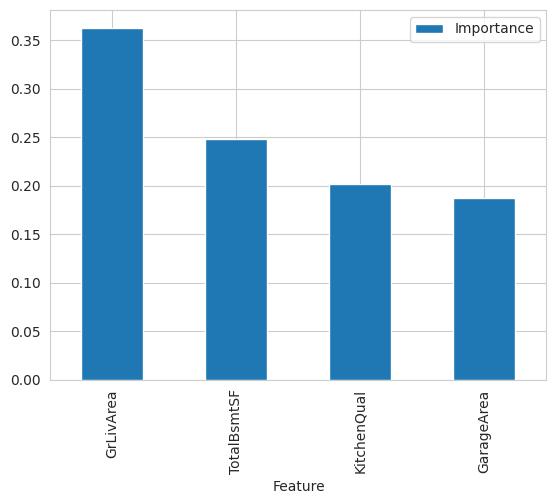

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('whitegrid')

data_cleaning_feat_eng_steps = 2

# Transforming the X_train using the steps before model selection
pipeline_steps_before_model = Pipeline(best_regressor_pipeline.steps[:data_cleaning_feat_eng_steps])
X_transformed = pipeline_steps_before_model.transform(X_train)

# Convert the transformed data back into a DataFrame to retain column names
columns_after_data_cleaning_feat_eng = pd.DataFrame(X_transformed, columns=X_train.columns)

# Get the most important features from the feature selection step
best_features = columns_after_data_cleaning_feat_eng.columns[best_regressor_pipeline['feat_selection'].get_support()].to_list()

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame({
    'Feature': best_features,
    'Importance': best_regressor_pipeline['model'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

# Plot the feature importance
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()


---

## Evaluate on Train and Test Sets

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)


def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(
        mean_squared_error(y, prediction)).round(3))
    print("\n")


def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")

    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")

    plt.show()

Model Evaluation 

* Train Set
R2 Score: 0.939
Mean Absolute Error: 12326.223
Mean Squared Error: 397149102.088
Root Mean Squared Error: 19928.6


* Test Set
R2 Score: 0.728
Mean Absolute Error: 23669.673
Mean Squared Error: 1452204345.721
Root Mean Squared Error: 38107.799




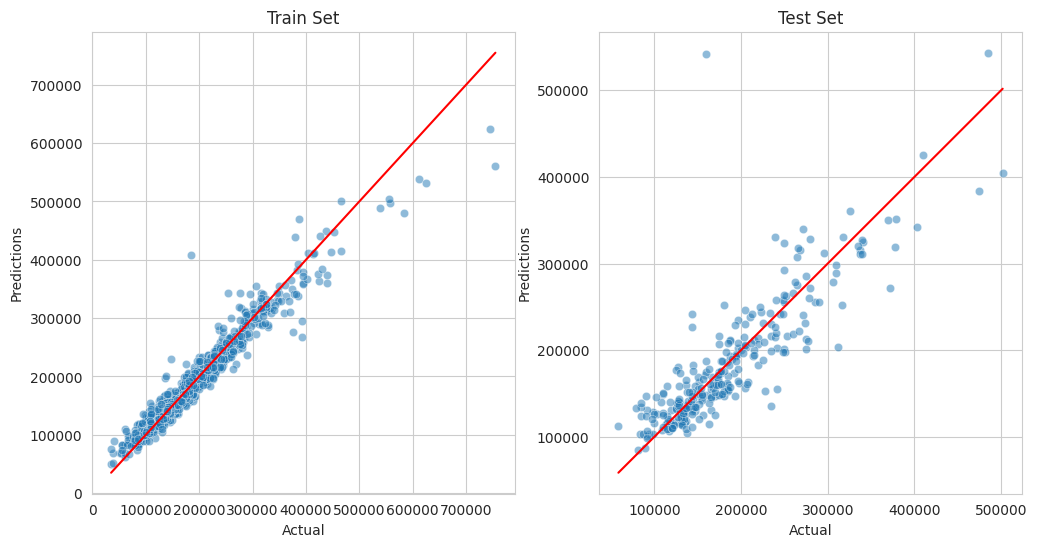

In [25]:
regression_performance(X_train, y_train, X_test, y_test, best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_regressor_pipeline)

---

## Observations and conclusions

The regression model with the feature engineered and trained dataset did not improve the fit of the model compared with the best model trained on the non-feature enginerred dataset, so the best model and pipeline from Notebook 5 will be used for the app.